# Taming Text

In this homework we will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy.

In [1]:
#A few dependecies are needed:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the data:

In [2]:
data_dir = 'hillary-clinton-emails/'
filename = 'Emails.csv'
df = pd.read_csv(data_dir + filename)

In [3]:
df.head(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\r\n-•-...-^\r\nH < hrod17@clintoner...,B6\r\nUNCLASSIFIED\r\nU.S. Department of State...
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\r\nFriday, March ...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\r\nWednesday, September 12, 2012 6:1

In [4]:
df.shape

(7945, 22)

In [5]:
df.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In order to generate, the fields that we can use are 'ExtractedBodyText' and 'RawText'. According to schema described <a href="https://www.kaggle.com/kaggle/hillary-clinton-emails">here</a>, 'RawText' is the raw email text extracted from the PDF and 'ExtractedBodyText' is the attempt to only pull out the text in the body that the email sender wrote. Thus it makes more sense to use 'ExtractedBodyText' to generate the word cloud. The subject can also be of interest.

## Assignment 1 - Word Cloud

In [6]:
from wordcloud import WordCloud
import nltk

### 1.1 First Cloud - WordCloud Library

To create our word cloud we will consider both the 'Extracted Body' and the 'Extracted Subject'. We join these into long strings of words as the structure is not critical to word counting.

In [7]:
# Get the text and put it into lists
body = df.dropna(subset=['ExtractedBodyText'],axis=0).ExtractedBodyText.astype('str').tolist()
subject = df.dropna(subset=['ExtractedSubject'],axis=0).ExtractedSubject.astype('str').tolist()

In [8]:
# Collapse into a long string
long_string_body = ' '.join(body)
long_string_subject = ' '.join(subject)
all_together = long_string_subject + ' ' + long_string_body

(-0.5, 399.5, 199.5, -0.5)

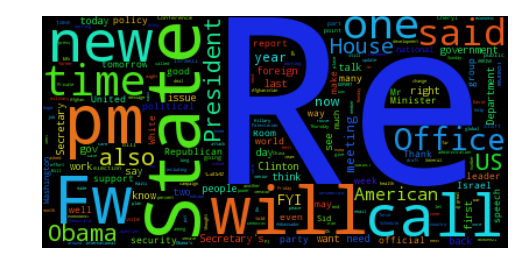

In [12]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together)
plt.imshow(wordcloud)
plt.axis("off")

We can already see a few bad things with word cloud. It has picked up "Re" and "Fw" from the subjects, it has huge precence of not very meaninful verbs like "will" or "said"

### 1.2 Second Cloud - Pre-processing pipeline & NLTK

Now we implement our text pre-processing pipeline:

In [13]:
#Download nltk if not done yet:
# nltk.download()

In [14]:
#Tokenization
tokens = nltk.word_tokenize(all_together)

We coded for tagging, but decided to go with it in the end

In [67]:
# #POS Tagging keep only nouns
# print("No. of tokens before POS: {}".format(len(new_tokens)))
# tmp = []
# token_tag = nltk.pos_tag(new_tokens)
# for tuple_token_tag in token_tag:
#     if tuple_token_tag[1] == 'NN':
#         tmp.append(tuple_token_tag[0])

# new_tokens = tmp
# print("No. of tokens after POS: {}".format(len(new_tokens)))

No. of tokens before POS: 472199
No. of tokens after POS: 147856


To stopwords we include some of the email typical ones

In [16]:
#Stopword removal
from nltk.corpus import stopwords
Stop = set(stopwords.words('english'))
extraStop = set(('re','fw','pm','am',"n't")) #here we make sure to add to the stopwords some of our own interest
finalStop = Stop.union(extraStop)

new_tokens = list()
for token in tokens:
    if token.lower() not in finalStop:
        new_tokens.append(token.lower())

We decided not to use stemming and use lemanization instead, which makes more sense in generating word clouds

In [17]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in new_tokens]

In [18]:
# #stemming
# stemmer = nltk.SnowballStemmer("english")
# stemmed = [stemmer.stem(lema) for lema in lemanized]

In [19]:
all_together2 = ' '.join(lemanized)

(-0.5, 399.5, 199.5, -0.5)

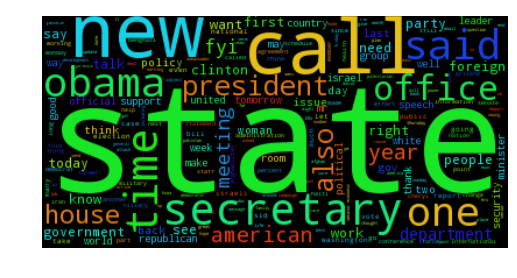

In [20]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together2)
plt.imshow(wordcloud)
plt.axis("off")

The new final result looks much better.

## Assignment 2 - Sentiment by Country

We loop across all the emails and inside across all the countries. If a match if found, sentiment analysis is computed with NLTK and it is added to a dataframe that keeps track of the cummulative result.

In [131]:
import pycountry
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [132]:
# Inspiration from:
# https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries

In [133]:
#Creating the DataFrame
df_countries = pd.DataFrame([i.name for i in pycountry.countries],columns=['Country']).set_index('Country')
df_countries['Cummulative_Sentiment'] = 0.0
df_countries['Frequency'] = 0

In [134]:
for country in pycountry.countries:
    print(country.name)

Aruba
Afghanistan
Angola
Anguilla
Åland Islands
Albania
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antarctica
French Southern Territories
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire, Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Saint Barthélemy
Belarus
Belize
Bermuda
Bolivia, Plurinational State of
Brazil
Barbados
Brunei Darussalam
Bhutan
Bouvet Island
Botswana
Central African Republic
Canada
Cocos (Keeling) Islands
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Congo, The Democratic Republic of the
Congo
Cook Islands
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Curaçao
Christmas Island
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands (Malvinas)
France
Faroe Islands
Micronesia, Federated States of
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Gui

We notice that some countries come in a form "name, extension" (like: "Iran, Islamic Republic of"). We will use this to broaden our search

In [135]:
def get_countries(body):
    tokens = nltk.word_tokenize(body)
    new_tokens = []
    for token in tokens:
        if token.lower() not in finalStop:
            new_tokens.append(token.lower())
    tmp = []
    token_tag = nltk.pos_tag(new_tokens)
    for tuple_token_tag in token_tag:
        if tuple_token_tag[1] == 'NN':
            tmp.append(tuple_token_tag[0])

    new_tokens = tmp
    countries = []
    for country in pycountry.countries:
        if country.name.lower() in new_tokens:
            countries.append(country.name)
    
    return countries

In [136]:
#Superloop incoming.. taking waaaaay too long. And it hasnt worked
extras = ['syria','Syria']

def update_feeling(scompound,df_countries,name):
    sc_old = df_countries.ix[name, 'Cummulative_Sentiment']
    freq = df_countries.ix[name, 'Frequency']
    sc_new = sc_old + scompound
    
    df_countries2 = df_countries.set_value(name, 'Cummulative_Sentiment', sc_new)
    df_countries2 = df_countries.set_value(name, 'Frequency', freq + 1)

    return df_countries2
            
for indx, email in enumerate(body):
    if indx%100 == 0:
        print("Processed {0:.2f}% of emails".format(100*indx/len(body)))
#     for country in pycountry.countries:
#         if ' ' + country.name + ' ' in email:
#             df_countries = update_feeling(email,df_countries,country.name)
#         elif ' ' + country.name.lower() + ' ' in email:
#             df_countries = update_feeling(email,df_countries,country.name)
#         elif ' ' + country.name.split(',',1)[0] + ' ' in email:
#             df_countries = update_feeling(email,df_countries,country.name)
#         elif ' ' + country.name.lower().split(',',1)[0] + ' ' in email:
#             df_countries = update_feeling(email,df_countries,country.name)
#         elif ' ' + country.alpha_2 + ' ' in email:
#             df_countries = update_feeling(email,df_countries,country.name)
            
#     for extra in extras:
#         if ' ' + extra + ' ' in email:
# #             print('found Syria')
#             df_countries = update_feeling(email,df_countries,'Syrian Arab Republic')
#             break
    scompound = sid.polarity_scores(email)['compound']
#     for country in get_countries(email):
    df_countries = update_feeling(scompound,df_countries,get_countries(email))
        
            
df_countries

Processed 0.00% of emails
Processed 1.48% of emails
Processed 2.97% of emails
Processed 4.45% of emails
Processed 5.93% of emails
Processed 7.42% of emails
Processed 8.90% of emails
Processed 10.38% of emails
Processed 11.87% of emails
Processed 13.35% of emails
Processed 14.83% of emails
Processed 16.32% of emails
Processed 17.80% of emails
Processed 19.28% of emails
Processed 20.77% of emails
Processed 22.25% of emails
Processed 23.73% of emails
Processed 25.22% of emails
Processed 26.70% of emails
Processed 28.18% of emails
Processed 29.66% of emails
Processed 31.15% of emails
Processed 32.63% of emails
Processed 34.11% of emails
Processed 35.60% of emails
Processed 37.08% of emails
Processed 38.56% of emails
Processed 40.05% of emails
Processed 41.53% of emails
Processed 43.01% of emails
Processed 44.50% of emails
Processed 45.98% of emails
Processed 47.46% of emails
Processed 48.95% of emails
Processed 50.43% of emails
Processed 51.91% of emails
Processed 53.40% of emails
Processe

,Cummulative_Sentiment,Frequency
Country,,
Aruba,0.0000,0
Afghanistan,26.0207,66
Angola,1.6460,5
Anguilla,0.0000,0
Åland Islands,0.0000,0
Albania,-0.9329,1
Andorra,0.0000,0
United Arab Emirates,0.0000,0
Argentina,4.0893,7


In [137]:
import pickle
with open('sentiment_by_country.pickle', 'wb') as handle:
    pickle.dump(df_countries, handle)

In [169]:
interesting_countries = df_countries.query('Cummulative_Sentiment<0 or Cummulative_Sentiment>0 and Frequency > 5')

In [170]:
avg_sentiment_countries = pd.DataFrame(interesting_countries.apply(lambda x: x['Cummulative_Sentiment'] / x['Frequency'] , axis = 1))
avg_sentiment_countries.columns = ['Cummulative_Sentiment']

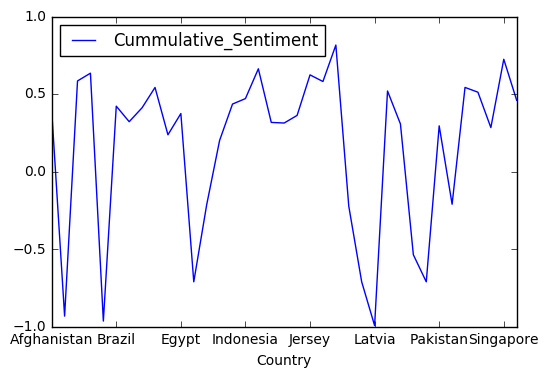

In [178]:
sentiment_after_thr = avg_sentiment_countries.query('Cummulative_Sentiment<-0.2 or Cummulative_Sentiment>0.2')
sentiment_after_thr.plot()

### 2.1 Viz by Country

## Assignment 3 - Topic Modeling

In [37]:
from gensim import models

In [34]:
# Inspired by:
# https://www.kaggle.com/forums/f/798/hillary-clinton-s-emails/t/16925/topic-modeling-visualization

In [43]:
# Infor on gensim:
# https://radimrehurek.com/gensim/tut1.html#corpus-formats


corpus = [[(1, 0.5)], []]
model = models.LdaModel(corpus, num_topics=10)

## *BONUS!*